# ITM+DS: Explainable and Transparent AI

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn import preprocessing,neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Load and show Data

In [2]:
df=pd.read_csv('heart_2020_cleaned.csv')
df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [4]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

## Data Transforming 

In [5]:
df = df.replace({'Yes': 1,'Yes (during pregnancy)':1, 'No': 0, 'Female': 0, 'Male' : 1, 'Very good': 4,'Good':3,'Fair':2,'Poor':1,'Excellent':5,'18-24':1,'25-29':2,'30-34':3,'35-39':4,'55-59': 8, '80 or older': 13,'65-69': 10,'40-44': 5,'70-74': 11,'60-64': 9,'50-54': 7,'75-79': 12,'45-49':6,'No, borderline diabetes':0})
df = df.drop(labels = ['Race', 'DiffWalking'],axis=1)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,8,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,13,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,1,10,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,12,0,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,0,5,0,1,4,8.0,0,0,0


## Data Cleaning

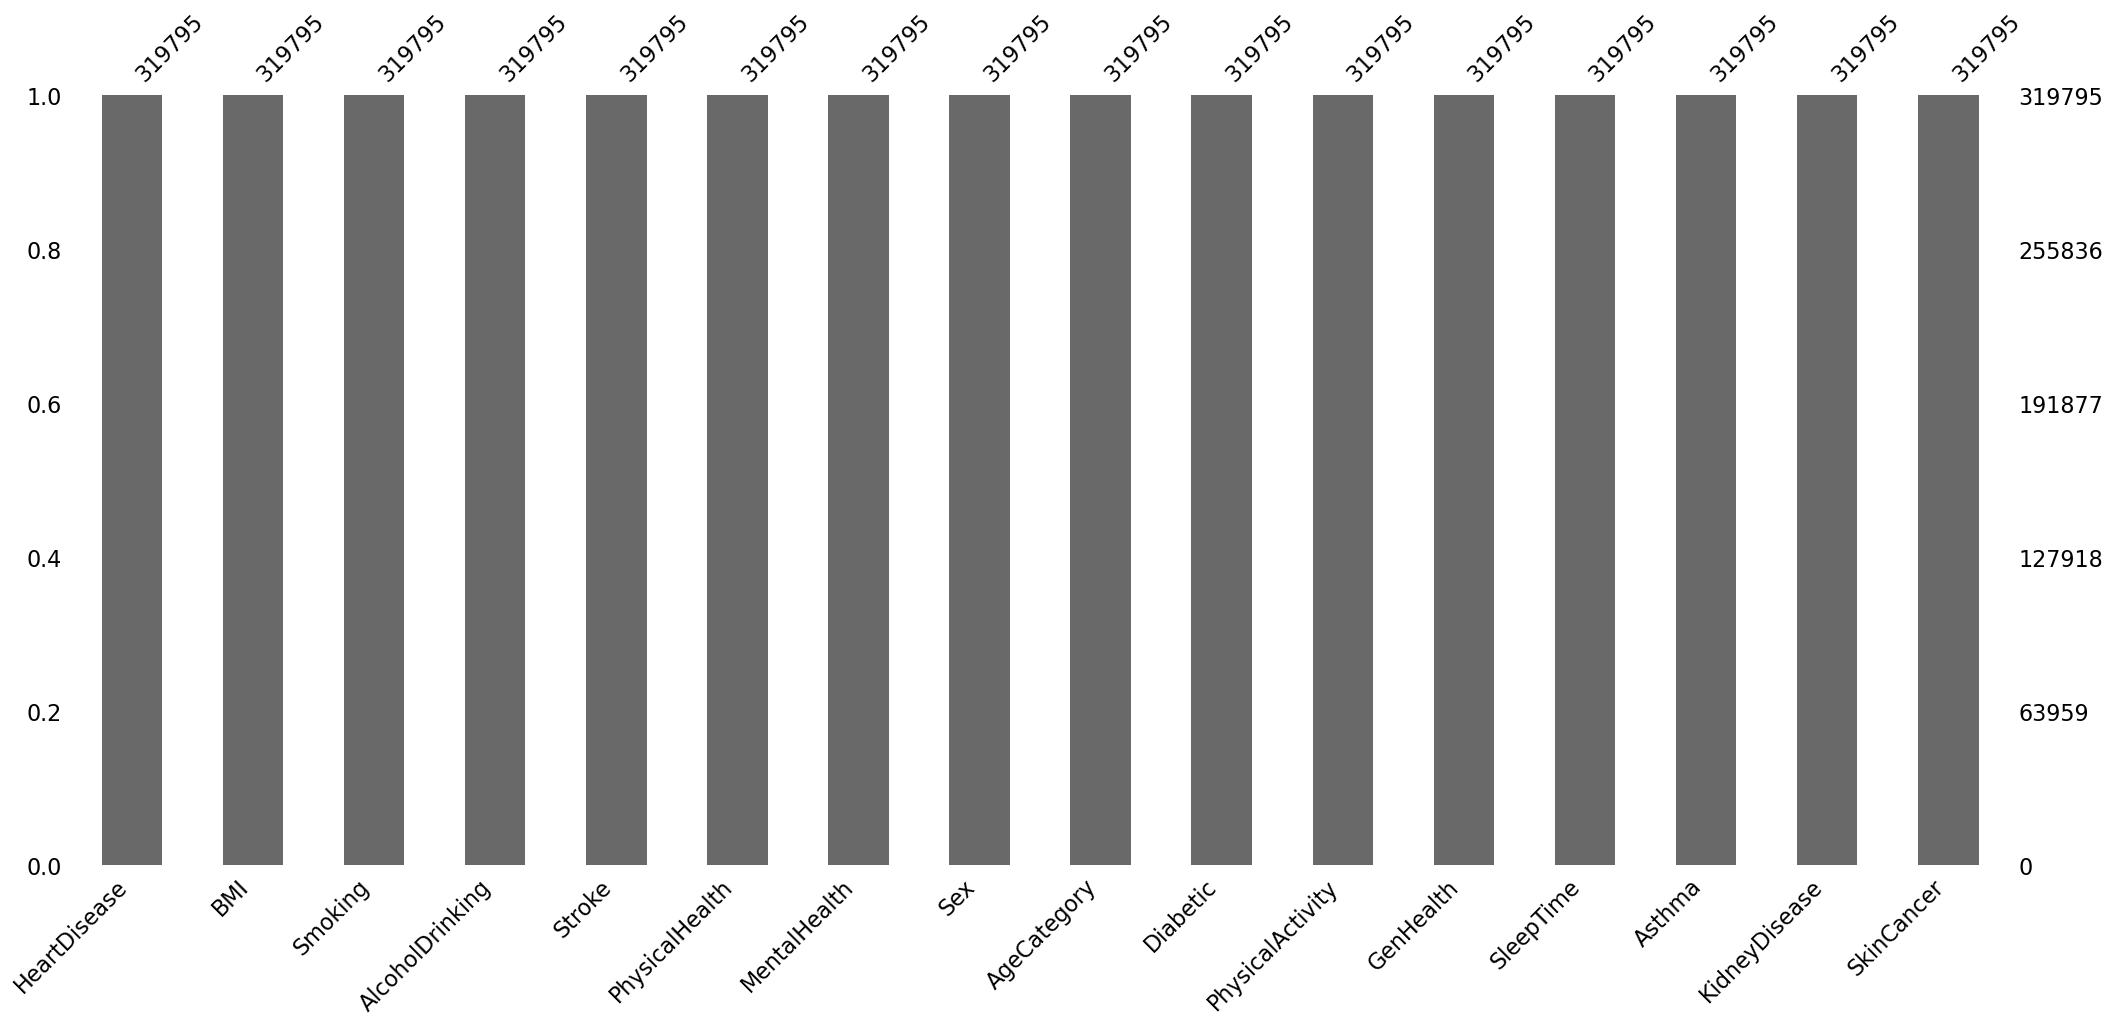

In [6]:
# missing values
msno.bar(df)

plt.show()

## Data Visualizing

In [7]:
df['HeartDisease'].value_counts()

HeartDisease
0    292422
1     27373
Name: count, dtype: int64

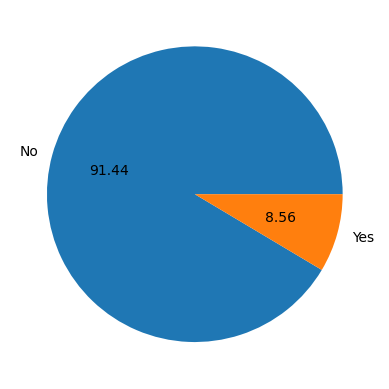

In [8]:
plt.pie(df['HeartDisease'].value_counts(), labels=['No','Yes'],autopct="%0.2f")
plt.show()

array([[<Axes: title={'center': 'HeartDisease'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoking'}>,
        <Axes: title={'center': 'AlcoholDrinking'}>],
       [<Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'PhysicalHealth'}>,
        <Axes: title={'center': 'MentalHealth'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'AgeCategory'}>,
        <Axes: title={'center': 'Diabetic'}>,
        <Axes: title={'center': 'PhysicalActivity'}>,
        <Axes: title={'center': 'GenHealth'}>],
       [<Axes: title={'center': 'SleepTime'}>,
        <Axes: title={'center': 'Asthma'}>,
        <Axes: title={'center': 'KidneyDisease'}>,
        <Axes: title={'center': 'SkinCancer'}>]], dtype=object)

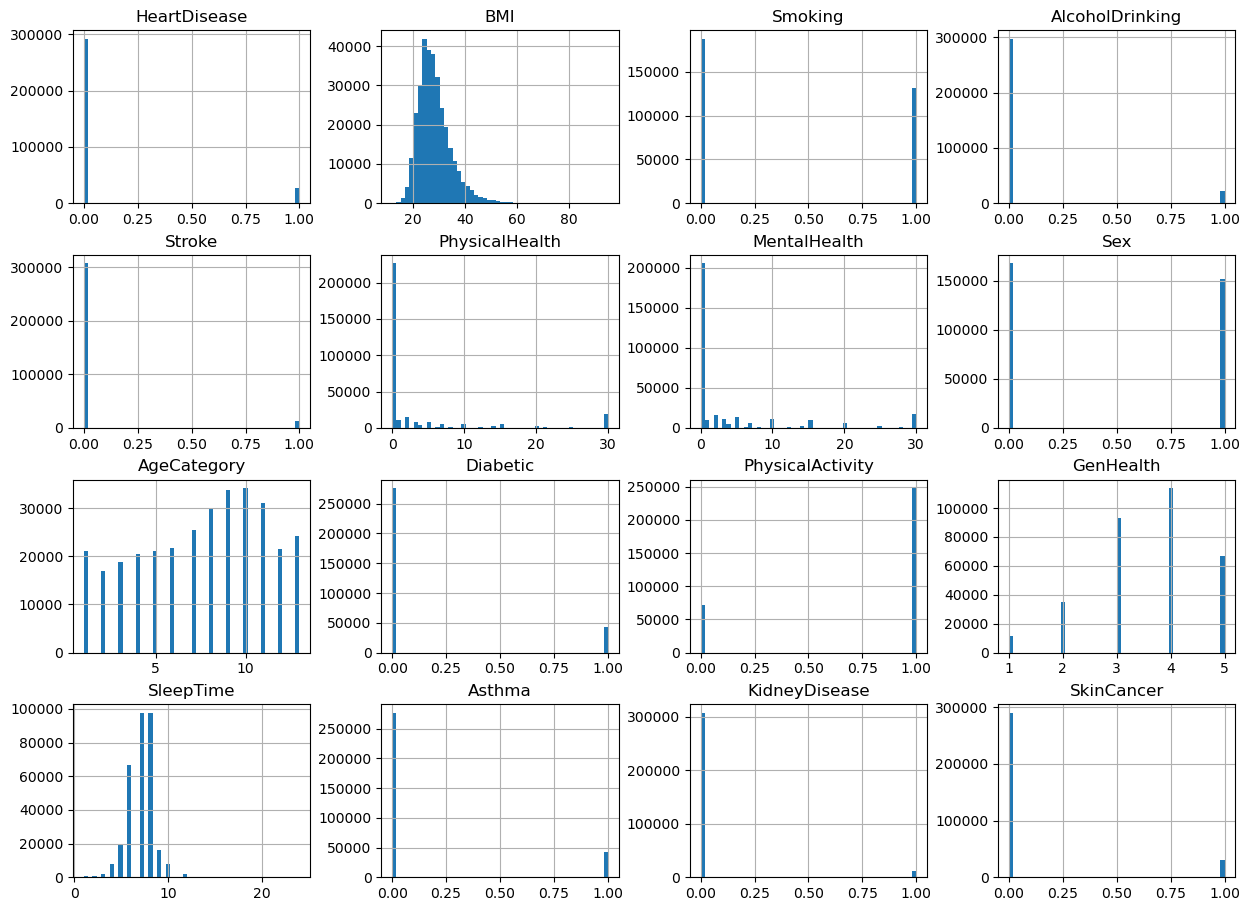

In [9]:
df.hist(bins = 50,figsize = (15,11))

<Axes: >

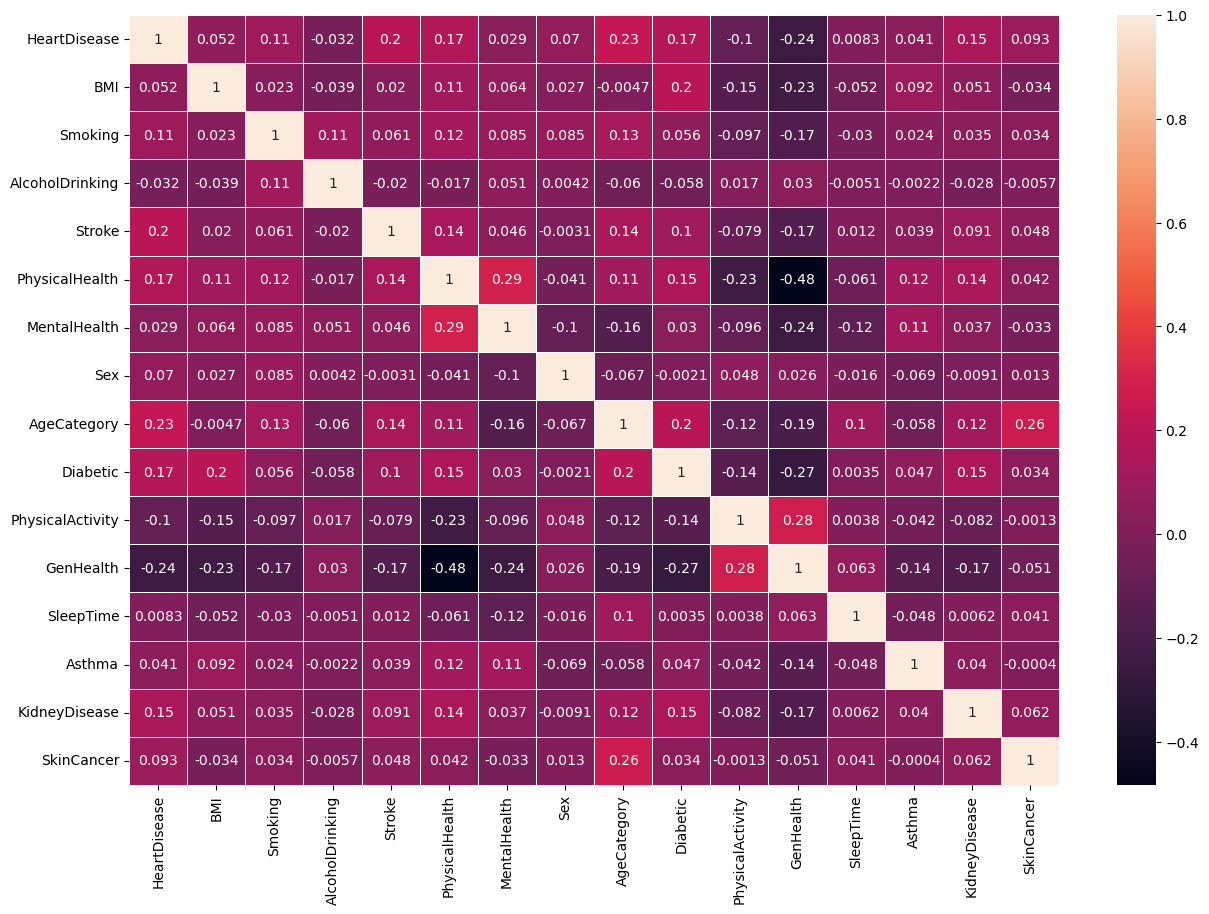

In [10]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

In [11]:
X = df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,8,1,1,4,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,13,0,1,4,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,1,10,1,1,2,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,12,0,0,3,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,0,5,0,1,4,8.0,0,0,0


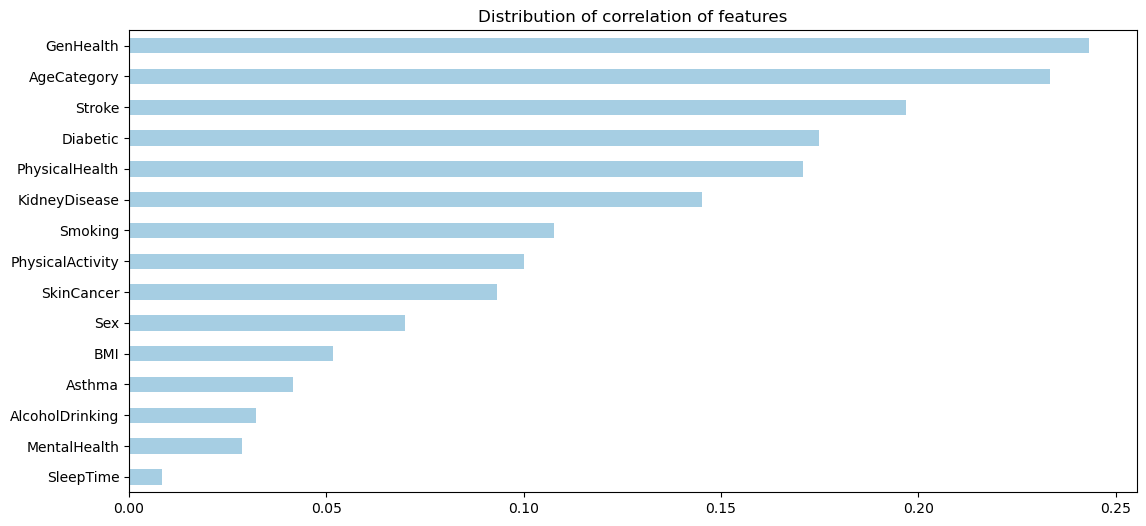

In [12]:
sns.set_palette('Paired')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(df.corr()['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()

In [13]:
y = df.iloc[:,[0]]
y.head()

,HeartDisease
0,0
1,0
2,0
3,0
4,0


In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

/Users/aklima/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


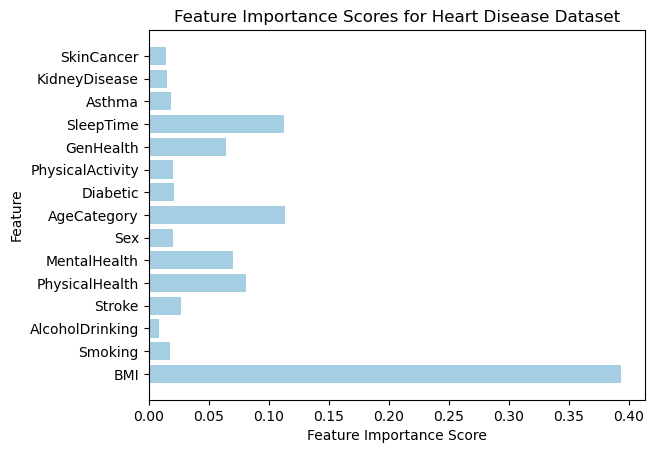

In [15]:
# Train a random forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Get the feature importance scores
importance = clf.feature_importances_

# Plot the feature importance scores
plt.barh(range(X.shape[1]), importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.yticks(range(X.shape[1]), X.columns)
plt.title("Feature Importance Scores for Heart Disease Dataset")
plt.show()

In [16]:
X_train.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
59508,27.12,1,0,0,0.0,0.0,1,7,0,1,5,6.0,0,0,0
178844,31.01,0,0,0,0.0,0.0,0,11,0,1,3,6.0,0,0,1
51053,26.61,1,0,0,0.0,0.0,1,9,0,1,5,12.0,0,0,1
42830,25.69,0,0,0,0.0,0.0,0,13,0,1,4,8.0,1,0,0
113148,27.71,0,0,0,0.0,2.0,1,2,0,1,5,9.0,0,0,0


In [17]:
y_train.head()

,HeartDisease
59508,0
178844,0
51053,0
42830,0
113148,0


In [18]:
from sklearn.tree import DecisionTreeClassifier  # DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [19]:
depth = range(1, 20) # 1 to 20
accuracy_scores = []
for i in depth:
    dt = DecisionTreeClassifier()
    dt.set_params(max_depth= i)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Accuracy with Max Depth {i}: {accuracy*100}%")

Accuracy with Max Depth 1: 91.40230460138527%
Accuracy with Max Depth 2: 91.40230460138527%
Accuracy with Max Depth 3: 91.40230460138527%
Accuracy with Max Depth 4: 91.44139214184086%
Accuracy with Max Depth 5: 91.47344392501446%
Accuracy with Max Depth 6: 91.44920964993199%
Accuracy with Max Depth 7: 91.46093591206866%
Accuracy with Max Depth 8: 91.46171766287779%
Accuracy with Max Depth 9: 91.41403086352194%
Accuracy with Max Depth 10: 91.29285948810957%
Accuracy with Max Depth 11: 91.1521443424694%
Accuracy with Max Depth 12: 91.05051673728482%
Accuracy with Max Depth 13: 90.82302725183321%
Accuracy with Max Depth 14: 90.54550571459842%
Accuracy with Max Depth 15: 90.3438140058475%
Accuracy with Max Depth 16: 90.08270923560406%
Accuracy with Max Depth 17: 89.768445410341%
Accuracy with Max Depth 18: 89.3869510154943%
Accuracy with Max Depth 19: 89.11490173392329%


In [20]:
# Create an instance of the class
DTC = DecisionTreeClassifier(max_depth=6) # Tree parameters

In [21]:
model = DTC.fit(X_train, y_train)

In [22]:
y_predict = model.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    116920
           1       0.53      0.05      0.09     10998

    accuracy                           0.91    127918
   macro avg       0.72      0.52      0.52    127918
weighted avg       0.88      0.91      0.88    127918



In [24]:
cf_matrix=confusion_matrix(y_test, y_predict)

<Axes: >

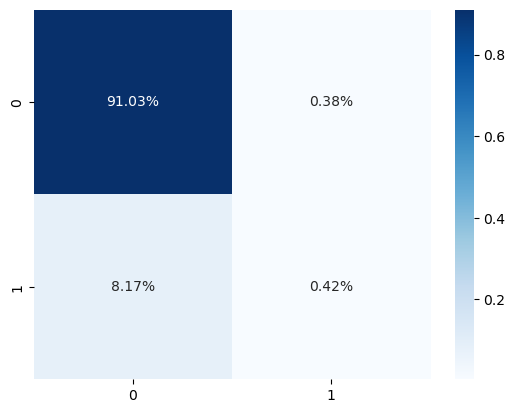

In [25]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')

In [26]:
print('Accuracy is: ', accuracy_score(y_test, y_predict)*100)

Accuracy is:  91.44920964993199
